**Fish Weight Prediction using various ML Models and comparison of them**

**Dataset_link: https://www.kaggle.com/datasets/aungpyaeap/fish-market**

**Step 1: Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

**Step 2: Read Dataset**

In [2]:
df=pd.read_csv('/content/Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
display(df.head())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


None

In [6]:
display(len(df['Species'].unique()))

7

**Step 3: Data cleaning and preprocessing**

In [7]:
# Check for missing values
print(df.isnull().sum())


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


**Here no missing value in dataset & also data is already cleaned so no need to do preprocessing and cleaning here**

**Step 4: Feature selection and elimination**

**1. Identify the features that are most relevant for predicting fish weight.**

**2. Use Recursive Feature Elimination (RFE) with the DecisionTreeRegressor.**

In [8]:
# Select the features and target
features = df.drop(['Weight'], axis=1)
target = df['Weight']

In [9]:
# Convert categorical features to numerical representation using one-hot encoding
categorical_features = ['Species']
numeric_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [10]:
# Perform one-hot encoding on categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(features[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Combine encoded features with numerical features
X = np.concatenate((encoded_features, features[numeric_features].values), axis=1)
X=pd.DataFrame(X)

In [12]:
print(X)

      0    1    2    3    4    5    6     7     8     9        10      11
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  23.2  25.4  30.0  11.5200  4.0200
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  24.0  26.3  31.2  12.4800  4.3056
2    1.0  0.0  0.0  0.0  0.0  0.0  0.0  23.9  26.5  31.1  12.3778  4.6961
3    1.0  0.0  0.0  0.0  0.0  0.0  0.0  26.3  29.0  33.5  12.7300  4.4555
4    1.0  0.0  0.0  0.0  0.0  0.0  0.0  26.5  29.0  34.0  12.4440  5.1340
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...      ...     ...
154  0.0  0.0  0.0  0.0  0.0  1.0  0.0  11.5  12.2  13.4   2.0904  1.3936
155  0.0  0.0  0.0  0.0  0.0  1.0  0.0  11.7  12.4  13.5   2.4300  1.2690
156  0.0  0.0  0.0  0.0  0.0  1.0  0.0  12.1  13.0  13.8   2.2770  1.2558
157  0.0  0.0  0.0  0.0  0.0  1.0  0.0  13.2  14.3  15.2   2.8728  2.0672
158  0.0  0.0  0.0  0.0  0.0  1.0  0.0  13.8  15.0  16.2   2.9322  1.8792

[159 rows x 12 columns]


In [13]:
# Perform Recursive Feature Elimination (RFE) with DecisionTreeRegressor
estimator = DecisionTreeRegressor()
selector = RFE(estimator, n_features_to_select=3, step=1)
X_selected = selector.fit_transform(X, target)

In [14]:
# Get the selected feature indices
X_selected

array([[30.    , 11.52  ,  4.02  ],
       [31.2   , 12.48  ,  4.3056],
       [31.1   , 12.3778,  4.6961],
       [33.5   , 12.73  ,  4.4555],
       [34.    , 12.444 ,  5.134 ],
       [34.7   , 13.6024,  4.9274],
       [34.5   , 14.1795,  5.2785],
       [35.    , 12.67  ,  4.69  ],
       [35.1   , 14.0049,  4.8438],
       [36.2   , 14.2266,  4.9594],
       [36.2   , 14.2628,  5.1042],
       [36.2   , 14.3714,  4.8146],
       [36.4   , 13.7592,  4.368 ],
       [37.3   , 13.9129,  5.0728],
       [37.2   , 14.9544,  5.1708],
       [37.2   , 15.438 ,  5.58  ],
       [38.3   , 14.8604,  5.2854],
       [38.5   , 14.938 ,  5.1975],
       [38.6   , 15.633 ,  5.1338],
       [38.7   , 14.4738,  5.7276],
       [39.5   , 15.1285,  5.5695],
       [39.2   , 15.9936,  5.3704],
       [39.7   , 15.5227,  5.2801],
       [40.6   , 15.4686,  6.1306],
       [40.5   , 16.2405,  5.589 ],
       [40.9   , 16.36  ,  6.0532],
       [40.6   , 16.3618,  6.09  ],
       [41.5   , 16.517 ,  5

**Step 5: Select the root node**

In [15]:
root_feature = X_selected[:,0]

In [16]:
root_feature

array([30. , 31.2, 31.1, 33.5, 34. , 34.7, 34.5, 35. , 35.1, 36.2, 36.2,
       36.2, 36.4, 37.3, 37.2, 37.2, 38.3, 38.5, 38.6, 38.7, 39.5, 39.2,
       39.7, 40.6, 40.5, 40.9, 40.6, 41.5, 41.6, 42.6, 44.1, 44. , 45.3,
       45.9, 46.5, 16.2, 20.3, 21.2, 22.2, 22.2, 22.8, 23.1, 23.7, 24.7,
       24.3, 25.3, 25. , 25. , 27.2, 26.7, 26.8, 27.9, 29.2, 30.6, 35. ,
       28.7, 29.3, 30.8, 34. , 39.6, 43.5, 16.5, 17.4, 19.8, 21.3, 22.4,
       23.2, 23.2, 24.1, 25.8, 28. , 29. ,  8.8, 14.7, 16. , 17.2, 18.5,
       19.2, 19.4, 20.2, 20.8, 21. , 22.5, 22.5, 22.5, 22.8, 23.5, 23.5,
       23.5, 23.5, 23.5, 24. , 24. , 24.2, 24.5, 25. , 25.5, 25.5, 26.2,
       26.5, 27. , 28. , 28.7, 28.9, 28.9, 28.9, 29.4, 30.1, 31.6, 34. ,
       36.5, 37.3, 39. , 38.3, 39.4, 39.3, 41.4, 41.4, 41.3, 42.3, 42.5,
       42.4, 42.5, 44.6, 45.2, 45.5, 46. , 46.6, 34.8, 37.8, 38.8, 39.8,
       40.5, 41. , 45.5, 45.5, 45.8, 48. , 48.7, 51.2, 55.1, 59.7, 64. ,
       64. , 68. , 10.8, 11.6, 11.6, 12. , 12.4, 12

**Step 6: Build a model**

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)


In [18]:
# Normalize numerical features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Build a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

**Step 7: Evaluation and visualization**

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [21]:
df = pd.DataFrame({'Real':y_test, 'Predicted':y_pred})
df

,Real,Predicted
78,78.0,80.0
155,13.4,12.2
128,200.0,300.0
55,270.0,300.0
94,150.0,150.0
29,1000.0,975.0
147,7.0,7.5
51,180.0,265.0
98,188.0,200.0
141,1250.0,1650.0


In [22]:
# Calculate evaluation metrics
dt_mae = mean_absolute_error(y_test, y_pred)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("R-squared (R2) Score:", dt_r2)

Mean Absolute Error (MAE): 48.368750000000006
Mean Squared Error (MSE): 8100.168125
Root Mean Squared Error (RMSE): 90.00093402293112
R-squared (R2) Score: 0.943052525745978


<ipython-input-23-6cc4f8483450>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='r')


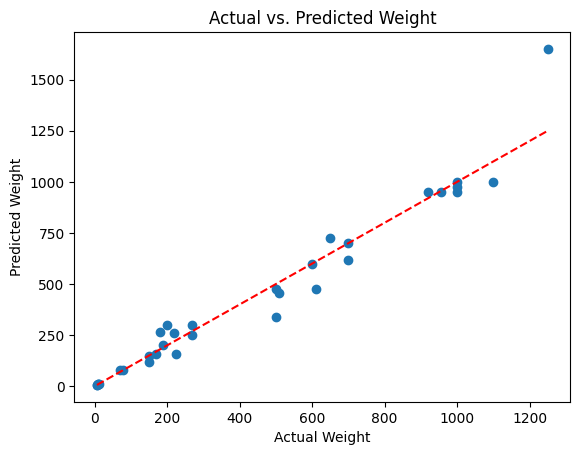

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='r')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs. Predicted Weight')
plt.show()


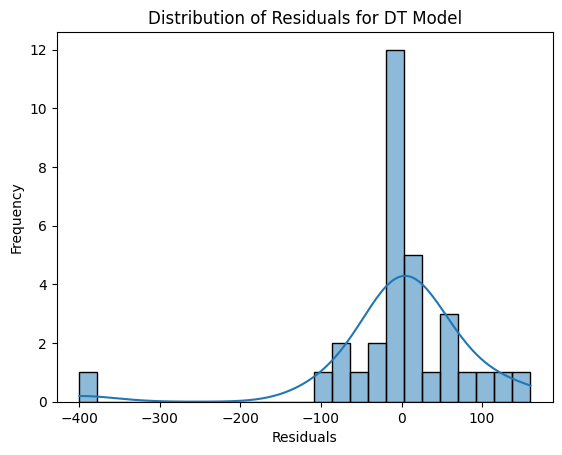

In [24]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for DT Model')
plt.show()


[Text(0.6450482536764706, 0.9615384615384616, 'x[2] <= 0.603\nsquared_error = 122928.22\nsamples = 127\nvalue = 386.794'),
 Text(0.38269761029411764, 0.8846153846153846, 'x[0] <= 0.318\nsquared_error = 20583.394\nsamples = 88\nvalue = 192.203'),
 Text(0.20105698529411764, 0.8076923076923077, 'x[2] <= 0.265\nsquared_error = 3365.56\nsamples = 56\nvalue = 98.57'),
 Text(0.10202205882352941, 0.7307692307692307, 'x[0] <= 0.128\nsquared_error = 779.015\nsamples = 20\nvalue = 35.795'),
 Text(0.06801470588235294, 0.6538461538461539, 'x[1] <= 0.075\nsquared_error = 136.996\nsamples = 13\nvalue = 17.492'),
 Text(0.04779411764705882, 0.5769230769230769, 'x[1] <= 0.036\nsquared_error = 20.298\nsamples = 10\nvalue = 11.54'),
 Text(0.029411764705882353, 0.5, 'x[0] <= 0.051\nsquared_error = 4.049\nsamples = 8\nvalue = 9.475'),
 Text(0.014705882352941176, 0.4230769230769231, 'x[1] <= 0.004\nsquared_error = 0.64\nsamples = 2\nvalue = 6.7'),
 Text(0.007352941176470588, 0.34615384615384615, 'squared_err

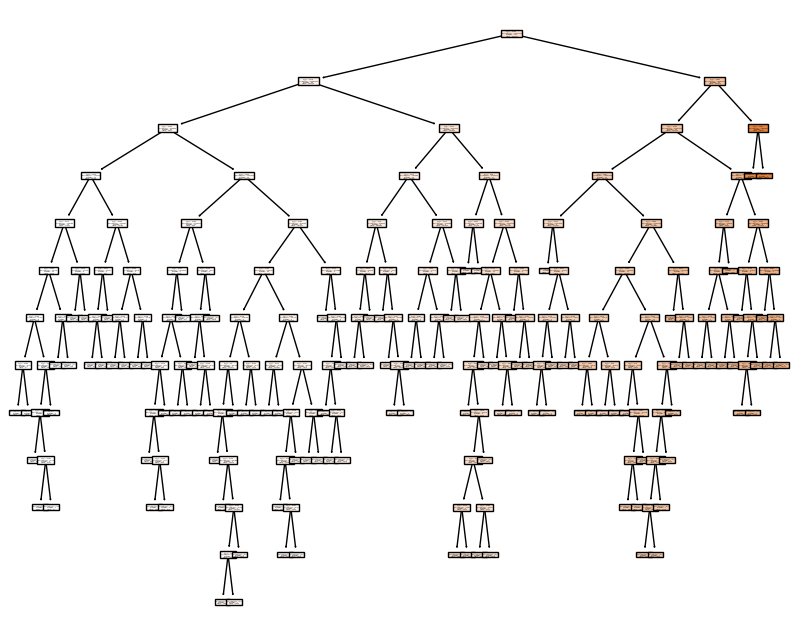

In [25]:
# Visualization
# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True)

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

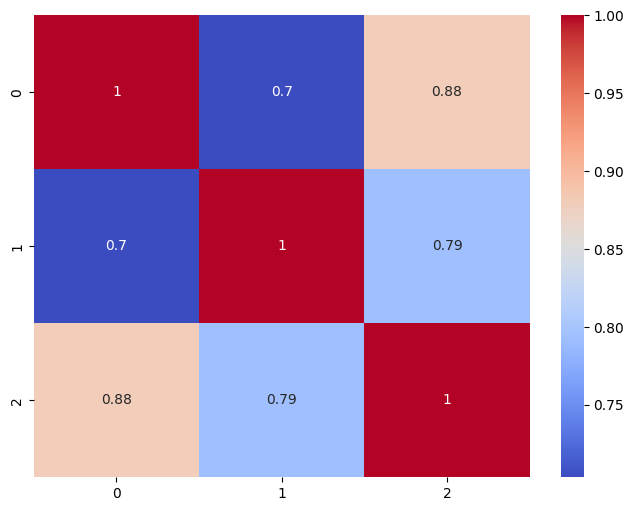

In [26]:
# Create a heatmap of feature correlations
X_selected=pd.DataFrame(X_selected)
corr = X_selected.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title

**Random Forest Model**

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Build a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions on the test set using Random Forest model
rf_y_pred = rf_model.predict(X_test_scaled)

In [30]:
df = pd.DataFrame({'Real':y_test, 'Predicted':rf_y_pred})
df

,Real,Predicted
78,78.0,89.400000
155,13.4,11.361000
128,200.0,306.760000
55,270.0,276.170000
94,150.0,138.670000
29,1000.0,923.050000
147,7.0,8.226000
51,180.0,233.240000
98,188.0,191.670000
141,1250.0,1555.908333


In [31]:
# Calculate evaluation metrics for Random Forest model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R2) Score:",rf_r2)

Mean Absolute Error (MAE): 44.49804166666666
Mean Squared Error (MSE): 5573.728655805551
Root Mean Squared Error (RMSE): 74.65740857949432
R-squared (R2) Score: 0.9608144220925796


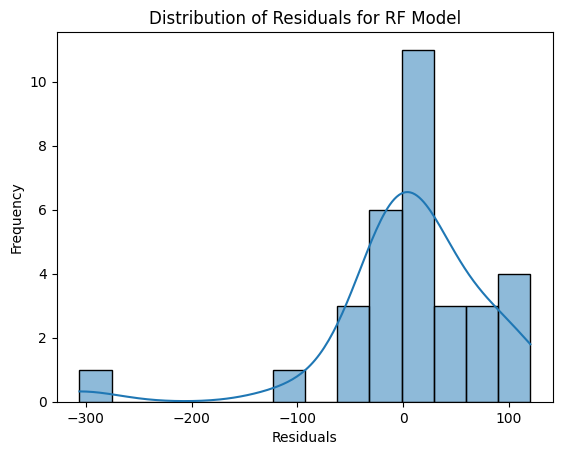

In [32]:
residuals = y_test - rf_y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for RF Model')
plt.show()

<ipython-input-33-123dad1fa5df>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='black')


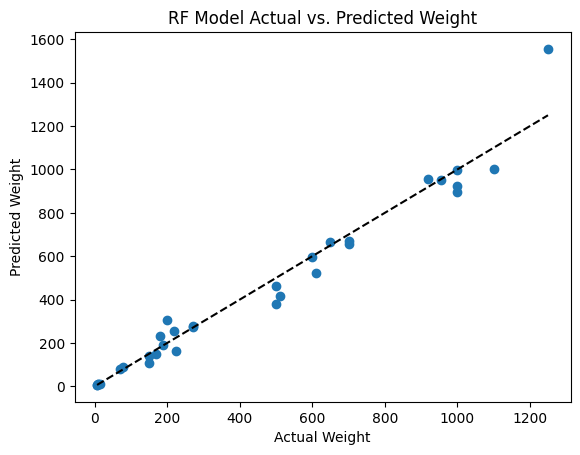

In [33]:
plt.scatter(y_test, rf_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='black')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('RF Model Actual vs. Predicted Weight')
plt.show()

**Linear Regression Model**

In [34]:
from sklearn.linear_model import LinearRegression

# Build a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
# Make predictions on the test set using Linear Regression model
lr_y_pred = lr_model.predict(X_test_scaled)

In [36]:
df = pd.DataFrame({'Real':y_test, 'Predicted':lr_y_pred})
df

,Real,Predicted
78,78.0,62.373863
155,13.4,-180.411377
128,200.0,386.885877
55,270.0,325.423377
94,150.0,197.318826
29,1000.0,769.134371
147,7.0,-227.027368
51,180.0,285.605085
98,188.0,268.387362
141,1250.0,1127.061612


In [37]:
# Calculate evaluation metrics for Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R-squared (R2) Score:", lr_r2)


Mean Absolute Error (MAE): 106.94110171832082
Mean Squared Error (MSE): 18176.402480858458
Root Mean Squared Error (RMSE): 134.81988904037289
R-squared (R2) Score: 0.8722125027115497


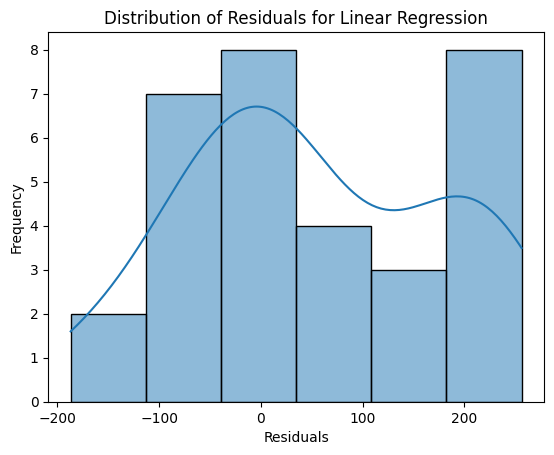

In [38]:
residuals = y_test - lr_y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals for Linear Regression')
plt.show()

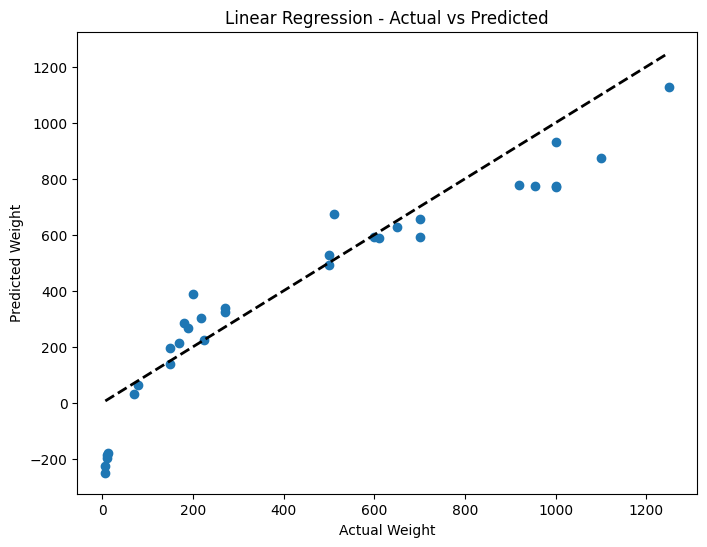

In [39]:
# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()

**Comparions of ML Models**

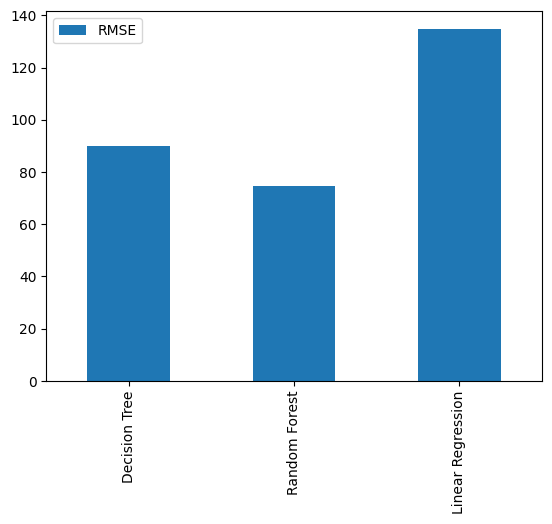

In [95]:
# Create a bar plot to compare RMSE for the models
metrics = {'RMSE':[dt_rmse,rf_rmse,lr_rmse]}
score=pd.DataFrame(metrics,index=['Decision Tree','Random Forest','Linear Regression'])
plot=score.plot.bar()

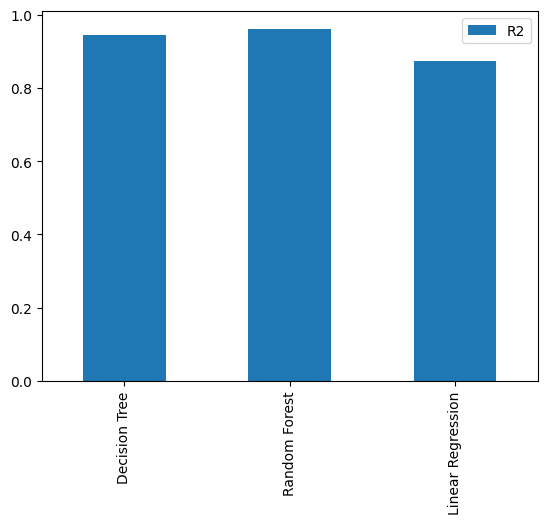

In [96]:
# Create a bar plot to compare R2 score for the models
metrics = {'R2':[dt_r2,rf_r2,lr_r2]}
score=pd.DataFrame(metrics,index=['Decision Tree','Random Forest','Linear Regression'])
plot=score.plot.bar()

**------END-------**